In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import datetime
import pickle
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
save_dir = datetime.datetime.now().strftime("models_%Y-%m-%d_%H-%M-%S")
os.makedirs(save_dir, exist_ok=True)

In [3]:

import re
import unicodedata
import itertools


import pandas as pd
import numpy as np
import pandas


import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

sns.set_theme(style='whitegrid')
palette='viridis'

import warnings
warnings.filterwarnings("ignore")

from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

import watermark

%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.13.2
Author: Library versions

sklearn   : 1.6.1
matplotlib: 3.10.1
pandas    : 2.2.3
seaborn   : 0.13.2
plotly    : 6.0.1
watermark : 2.5.0
xgboost   : 3.0.0
lightgbm  : 4.6.0
re        : 2.2.1
numpy     : 2.2.4
platform  : 1.0.8



In [4]:
train_df = pd.read_csv("Thyroid_Diff.csv")
train_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
train_df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
train_df.Recurred.head()


0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Recurred_2'] = label_encoder.fit_transform(train_df['Recurred'])

label_encoder

LabelEncoder()

In [8]:
train_df.Recurred_2.head()



0    0
1    0
2    0
3    0
4    0
Name: Recurred_2, dtype: int64

In [9]:
train_data_encoded = train_df.copy()

label_encoder = LabelEncoder()

for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy',
           "Pathology", 'Focality', 'Risk', 'T', "N", "M", "Stage", "Response", "Recurred"]:
    train_data_encoded[col] = label_encoder.fit_transform(train_data_encoded[col])
    
label_encoder

LabelEncoder()

In [10]:
train_data_encoded['Age_Smoking'] = train_data_encoded['Age'] * train_data_encoded['Smoking']
train_data_encoded['Age_Risk'] = train_data_encoded['Age'] * train_data_encoded['Risk']
train_data_encoded['Age_squared'] = train_data_encoded['Age'] ** 2


In [11]:
train_data_encoded.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,T,N,M,Stage,Response,Recurred,Recurred_2,Age_Smoking,Age_Risk,Age_squared
0,27,0,0,0,0,2,3,3,2,1,...,0,0,0,0,2,0,0,0,54,729
1,34,0,0,1,0,2,1,3,2,1,...,0,0,0,0,1,0,0,0,68,1156
2,30,0,0,0,0,2,4,3,2,1,...,0,0,0,0,1,0,0,0,60,900
3,62,0,0,0,0,2,4,3,2,1,...,0,0,0,0,1,0,0,0,124,3844
4,62,0,0,0,0,2,1,3,2,0,...,0,0,0,0,1,0,0,0,124,3844


In [12]:
train_data_encoded.drop(columns=['Recurred_2'], inplace=True)
train_data_encoded.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Smoking,Age_Risk,Age_squared
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,0,54,729
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,0,68,1156
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0,60,900
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0,124,3844
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,0,124,3844


In [13]:
train_data_encoded.fillna(method='ffill', inplace=True)
train_data_encoded


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Smoking,Age_Risk,Age_squared
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0,0,54,729
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0,0,68,1156
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0,60,900
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0,0,124,3844
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0,0,124,3844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1,72,0,5184
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1,81,0,6561
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1,72,0,5184
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1,61,0,3721


In [14]:
X = train_data_encoded.drop(columns=['Recurred'])
y = train_data_encoded['Recurred']


In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

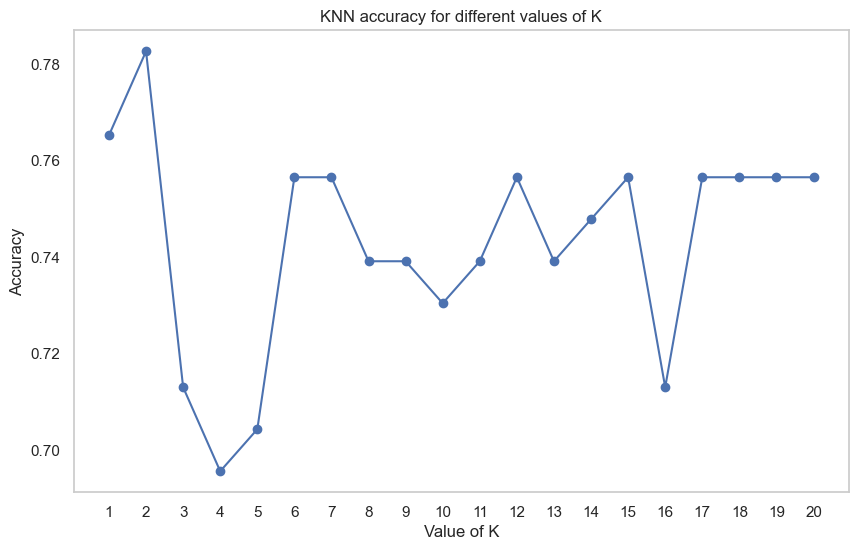

Best value of K: 2
Corresponding accuracy: 0.782608695652174


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [17]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from catboost import CatBoostClassifier
print(CatBoostClassifier())


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [
    GaussianNB(),
    
    DecisionTreeClassifier(random_state=42),
    
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    LogisticRegression(random_state=42),
    
    AdaBoostClassifier(random_state=42),

    ExtraTreesClassifier(n_estimators=100, random_state=42),         
    
    GradientBoostingClassifier(n_estimators=100, random_state=42),    
    
    CatBoostClassifier(verbose=0, random_state=42),                  
    
    ExtraTreeClassifier(random_state=42),       

    XGBClassifier(tree_method='gpu_hist', random_state=42),

    LGBMClassifier(device='gpu')]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8917910447761194
Testing Accuracy: 0.9130434782608695
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9304347826086956
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478
-----------------
LogisticRegression(random_state=42)

Model 4: LogisticRegression

Training Accuracy: 0.914179104477612
Testing Accuracy: 0.9304347826086956
-----------------
AdaBoostClassifier(random_state=42)

Model 5: AdaBoostClassifier

Training Accuracy: 0.9664179104477612
Testing Accuracy: 0.9652173913043478
-----------------
ExtraTreesClassifier(random_state=42)

Model 6: ExtraTreesClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478
-----------------
GradientBoostingClassifier(random_state=42)

Model 7: GradientBoostingClassifier

Training Accuracy: 1.

  File "C:\Users\user\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1550, in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [20]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model 1: GaussianNB
Training Accuracy: 0.8917910447761194
Testing Accuracy: 0.9130434782608695

Confusion matrix 

 [[79  4]
 [ 6 26]]

True Positives(TP) =  79

True Negatives(TN) =  26

False Positives(FP) =  4

False Negatives(FN) =  6


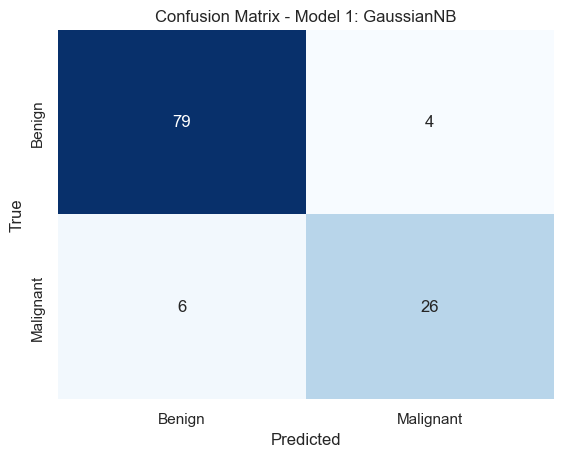

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9304347826086956

Confusion matrix 

 [[76  7]
 [ 1 31]]

True Positives(TP) =  76

True Negatives(TN) =  31

False Positives(FP) =  7

False Negatives(FN) =  1


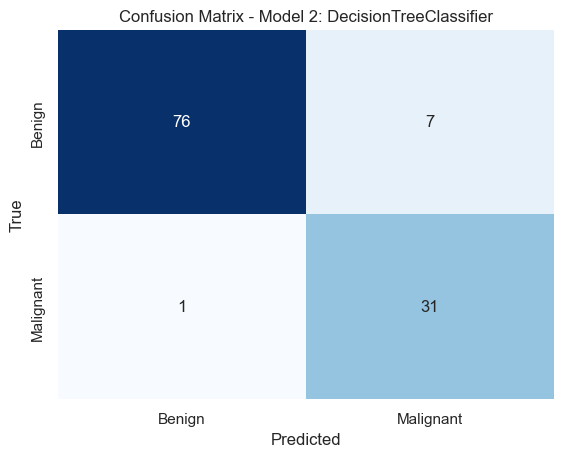

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478

Confusion matrix 

 [[80  3]
 [ 1 31]]

True Positives(TP) =  80

True Negatives(TN) =  31

False Positives(FP) =  3

False Negatives(FN) =  1


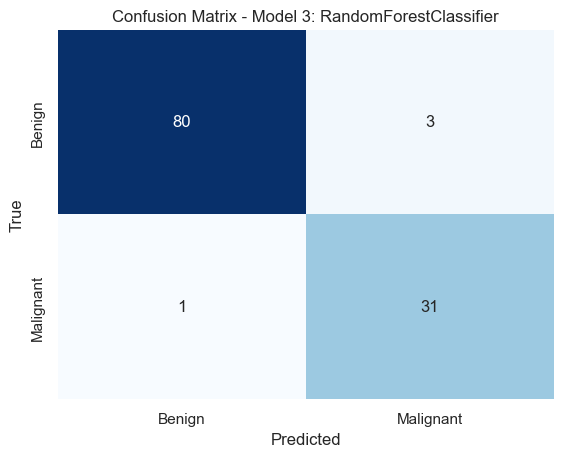

------------------
Model 4: LogisticRegression
Training Accuracy: 0.914179104477612
Testing Accuracy: 0.9304347826086956

Confusion matrix 

 [[79  4]
 [ 4 28]]

True Positives(TP) =  79

True Negatives(TN) =  28

False Positives(FP) =  4

False Negatives(FN) =  4


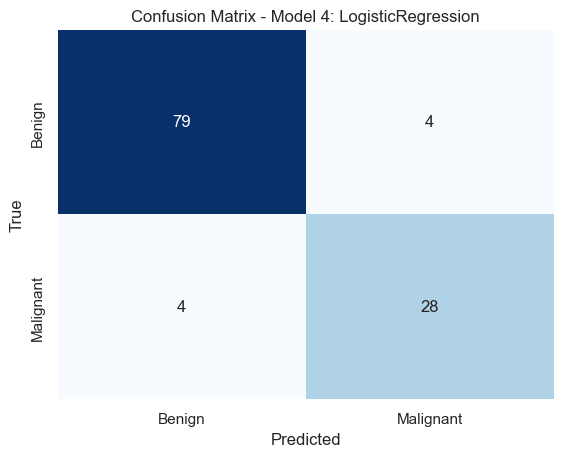

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.9664179104477612
Testing Accuracy: 0.9652173913043478

Confusion matrix 

 [[81  2]
 [ 2 30]]

True Positives(TP) =  81

True Negatives(TN) =  30

False Positives(FP) =  2

False Negatives(FN) =  2


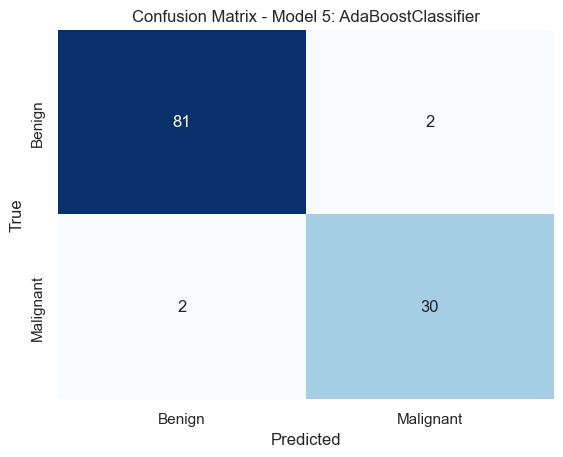

------------------
Model 6: ExtraTreesClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478

Confusion matrix 

 [[82  1]
 [ 3 29]]

True Positives(TP) =  82

True Negatives(TN) =  29

False Positives(FP) =  1

False Negatives(FN) =  3


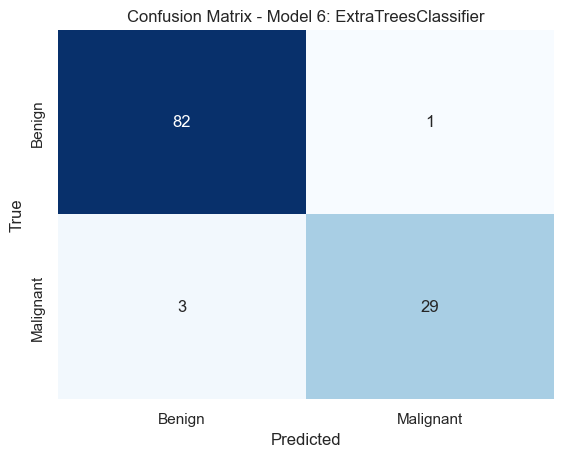

------------------
Model 7: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9391304347826087

Confusion matrix 

 [[77  6]
 [ 1 31]]

True Positives(TP) =  77

True Negatives(TN) =  31

False Positives(FP) =  6

False Negatives(FN) =  1


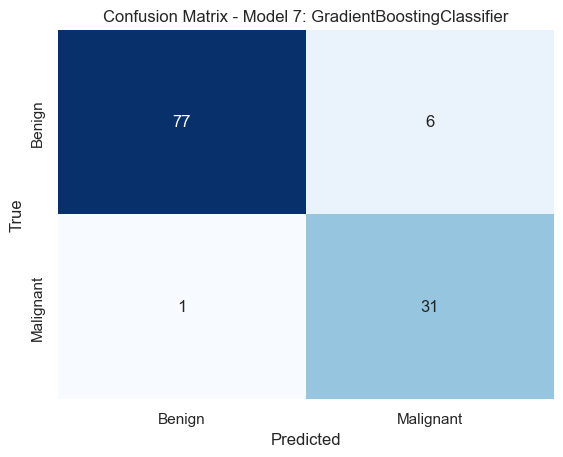

------------------
Model 8: CatBoostClassifier
Training Accuracy: 0.996268656716418
Testing Accuracy: 0.9739130434782609

Confusion matrix 

 [[82  1]
 [ 2 30]]

True Positives(TP) =  82

True Negatives(TN) =  30

False Positives(FP) =  1

False Negatives(FN) =  2


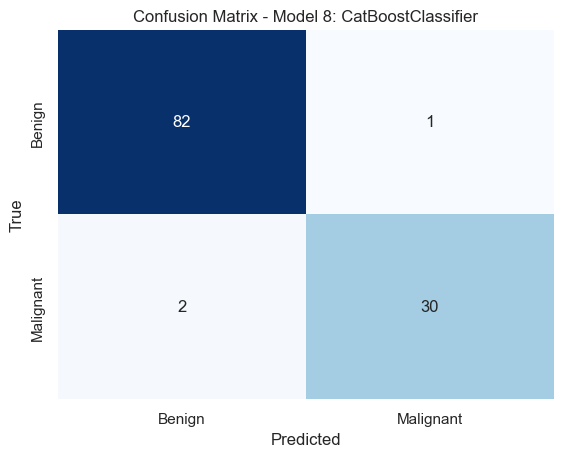

------------------
Model 9: ExtraTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8521739130434782

Confusion matrix 

 [[74  9]
 [ 8 24]]

True Positives(TP) =  74

True Negatives(TN) =  24

False Positives(FP) =  9

False Negatives(FN) =  8


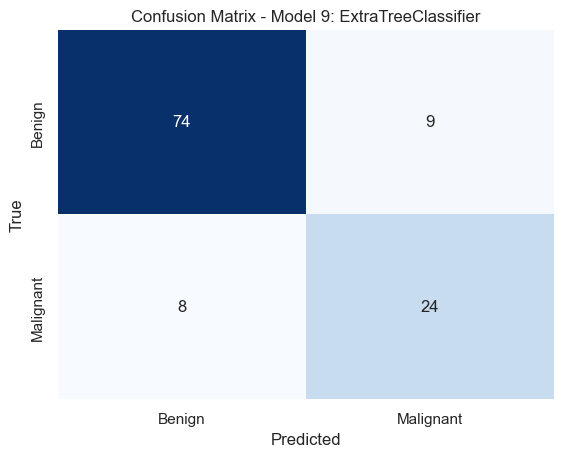

------------------
Model 10: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9565217391304348

Confusion matrix 

 [[79  4]
 [ 1 31]]

True Positives(TP) =  79

True Negatives(TN) =  31

False Positives(FP) =  4

False Negatives(FN) =  1


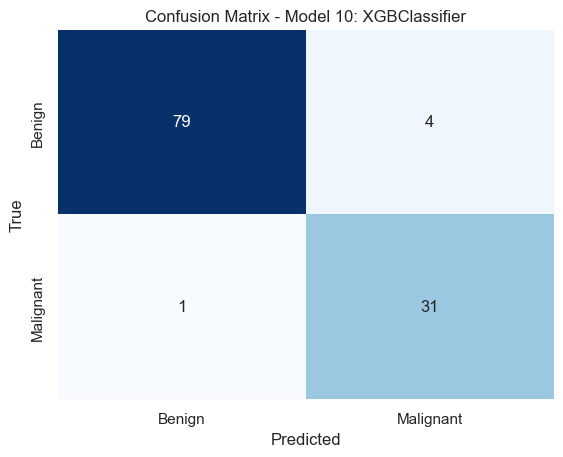

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 76, number of negative: 192
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 17
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.00 MB) transferred to GPU in 0.000519 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283582 -> initscore=-0.926762
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

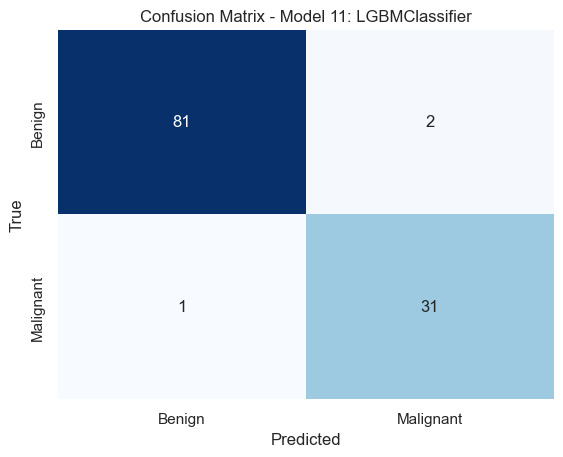

------------------


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Benign", "Malignant"], 
                yticklabels=["Benign", "Malignant"])
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")


Model 1: GaussianNB
Training Accuracy: 0.8917910447761194
Testing Accuracy: 0.9130434782608695


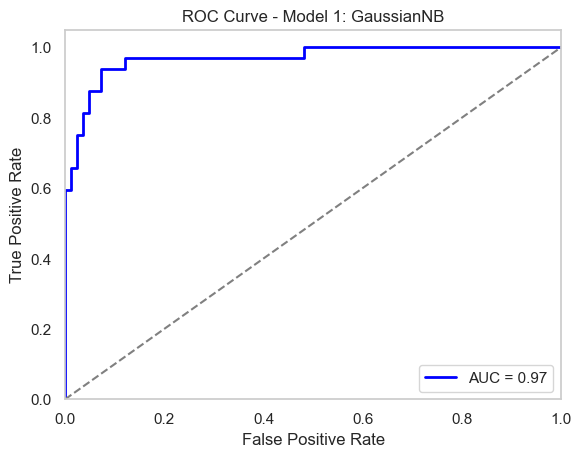

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9304347826086956


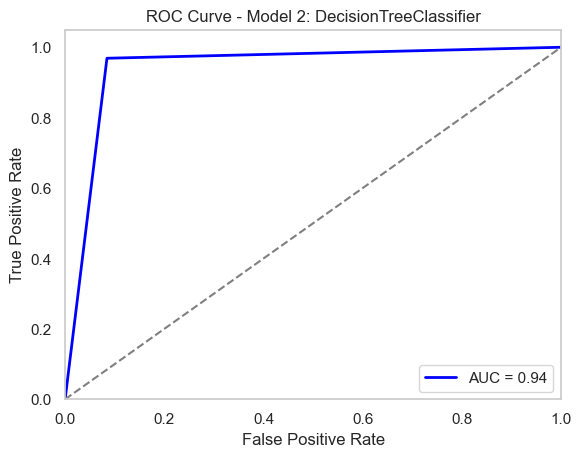

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.8097014925373134
Testing Accuracy: 0.7043478260869566


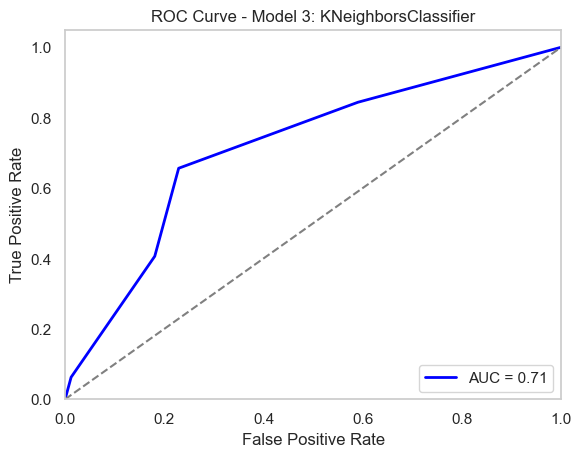

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478


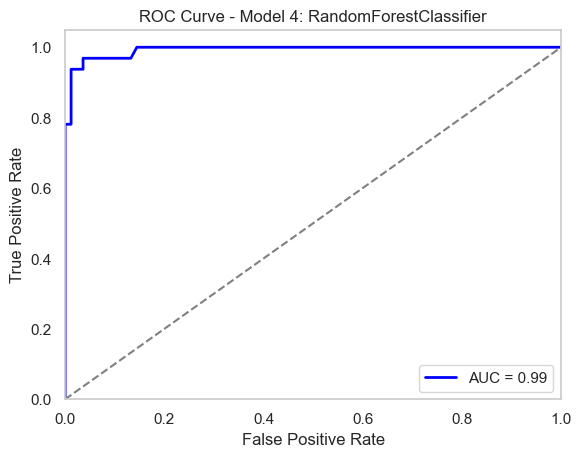

------------------
Model 5: LogisticRegression
Training Accuracy: 0.914179104477612
Testing Accuracy: 0.9304347826086956


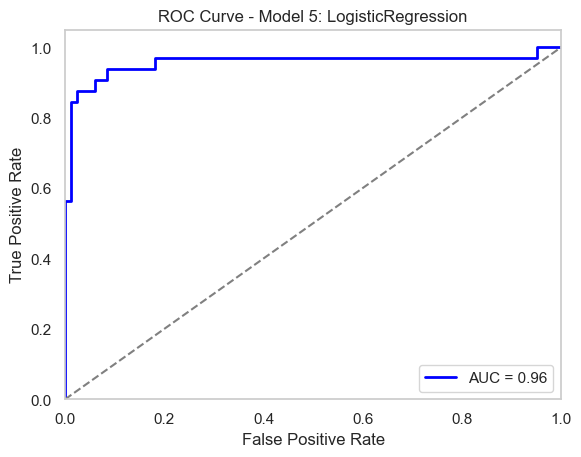

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.9664179104477612
Testing Accuracy: 0.9652173913043478


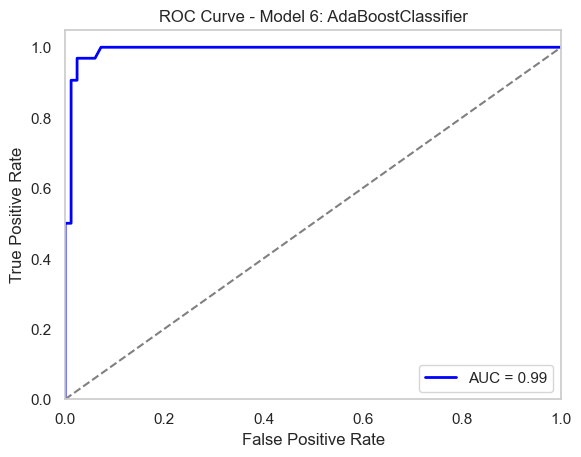

------------------
Model 7: ExtraTreesClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478


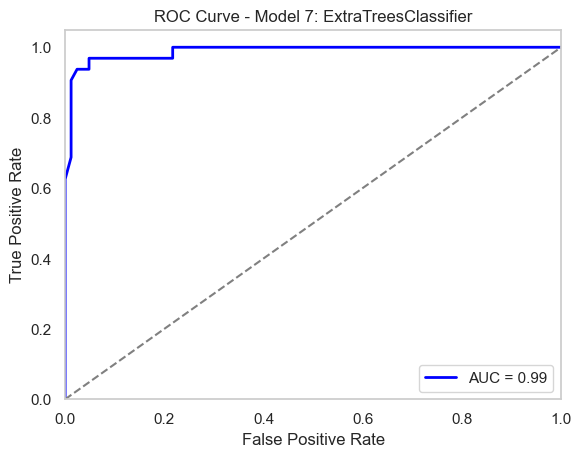

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9391304347826087


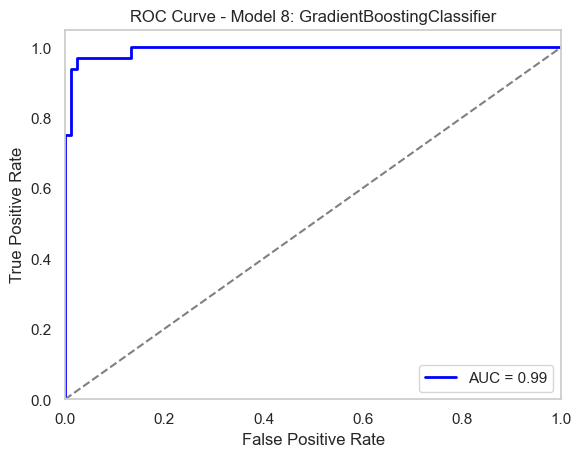

------------------
Model 9: CatBoostClassifier
Training Accuracy: 0.996268656716418
Testing Accuracy: 0.9739130434782609


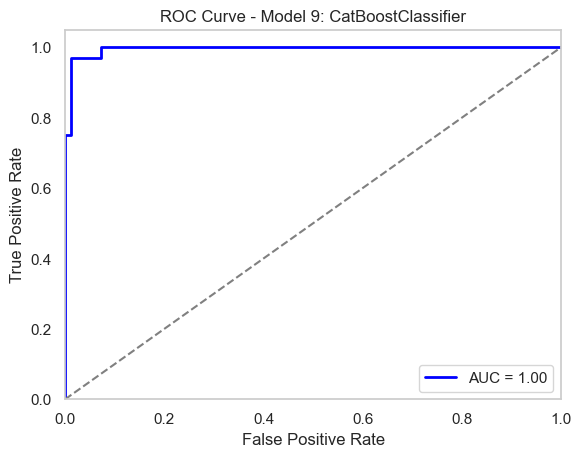

------------------
Model 10: ExtraTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8521739130434782


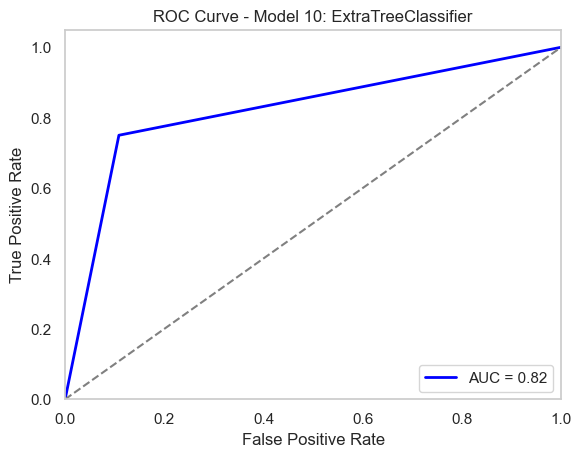

------------------
Model 11: SVC
Training Accuracy: 0.7313432835820896
Testing Accuracy: 0.7913043478260869


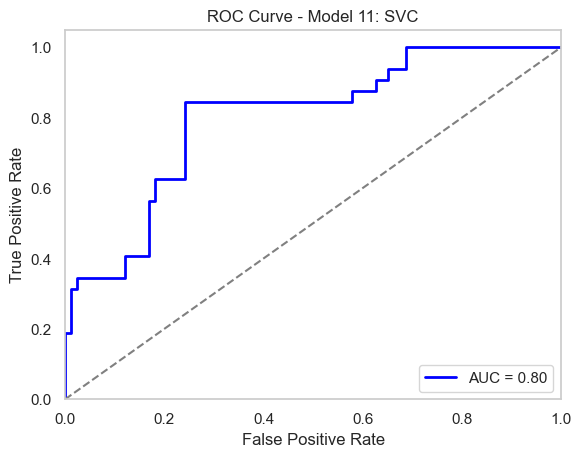

------------------
Model 12: GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9391304347826087


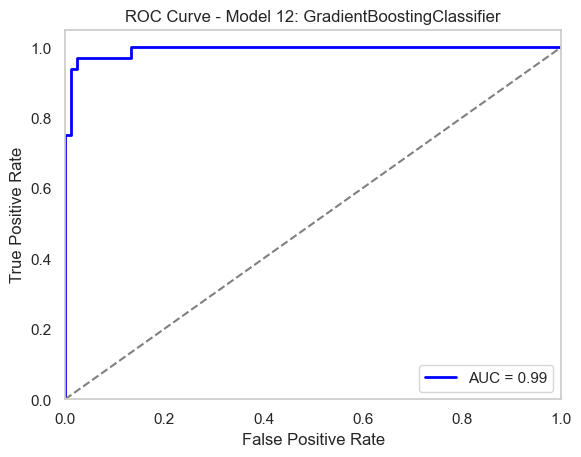

------------------
Model 13: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9652173913043478


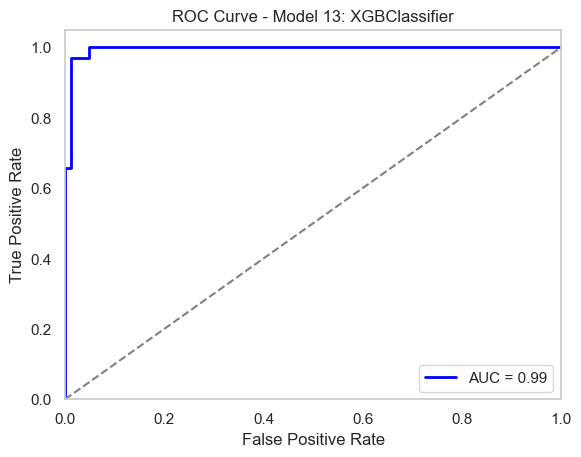

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 76, number of negative: 192
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 17
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.00 MB) transferred to GPU in 0.000566 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283582 -> initscore=-0.926762
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

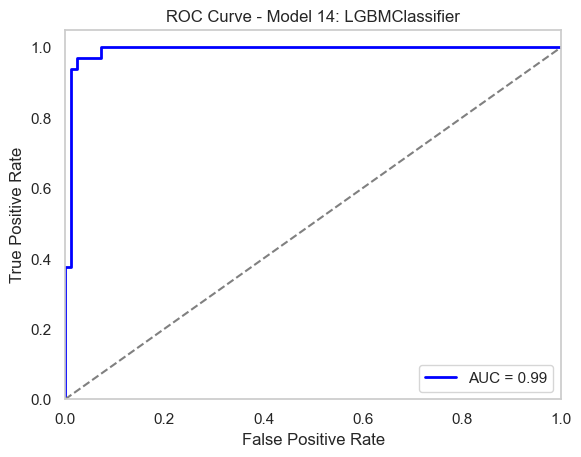

------------------


In [22]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),         
    GradientBoostingClassifier(n_estimators=100, random_state=42),    
    CatBoostClassifier(verbose=0, random_state=42),                  
    ExtraTreeClassifier(random_state=42),       
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(device='gpu')]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    y_probs = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
 
    auc = roc_auc_score(y_test, y_probs)
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")


In [23]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42), 
        ExtraTreesClassifier(n_estimators=100, random_state=42),         
        GradientBoostingClassifier(n_estimators=100, random_state=42),    
    
    CatBoostClassifier(verbose=0, random_state=42),                  
    
    ExtraTreeClassifier(random_state=42),       
          XGBClassifier(random_state=42),
          LGBMClassifier()]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")



Model 1: GaussianNB

Training Accuracy: 0.8917910447761194
Testing Accuracy: 0.9130434782608695

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        83
           1       0.87      0.81      0.84        32

    accuracy                           0.91       115
   macro avg       0.90      0.88      0.89       115
weighted avg       0.91      0.91      0.91       115



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9304347826086956

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        83
           1       0.82      0.97      0.89        32

    accuracy                           0.93       115
   macro avg       0.90      0.94      0.92       115
weighted avg       0.94      0.93      0.93       115



Model 3: KNeighborsClassifier

Training Accuracy: 0.8097014925373134
Testing Accuracy: 0.7043478260869

In [24]:
models = [
   GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),         
    GradientBoostingClassifier(n_estimators=100, random_state=42),    
    CatBoostClassifier(verbose=0, random_state=42),                  
    ExtraTreeClassifier(random_state=42),       
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(device='gpu')]


metricas = []

for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    metrics = {
        "Model": type(model).__name__,
        "Accuracy": test_accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score'],
        "Support": report['weighted avg']['support']
    }
    metricas.append(metrics)

df_metricas = pd.DataFrame(metricas)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

df_metricas_styled


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 76, number of negative: 192
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 17
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.00 MB) transferred to GPU in 0.000584 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283582 -> initscore=-0.926762
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.913043,0.911952,0.913043,0.912159,115.000000
1,DecisionTreeClassifier,0.930435,0.939368,0.930435,0.932112,115.000000
2,KNeighborsClassifier,0.704348,0.693310,0.704348,0.697971,115.000000
3,RandomForestClassifier,0.965217,0.966537,0.965217,0.965532,115.000000
4,LogisticRegression,0.930435,0.930435,0.930435,0.930435,115.000000
5,AdaBoostClassifier,0.965217,0.965217,0.965217,0.965217,115.000000
6,ExtraTreesClassifier,0.965217,0.965251,0.965217,0.964863,115.000000
7,GradientBoostingClassifier,0.939130,0.945624,0.939130,0.940391,115.000000
8,CatBoostClassifier,0.973913,0.973840,0.973913,0.973784,115.000000
9,ExtraTreeClassifier,0.852174,0.853697,0.852174,0.852863,115.000000


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Extra Tree": ExtraTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "CatBoost": CatBoostClassifier(verbose=0, learning_rate=0.1, iterations=100, random_state=42),
    "LightGBM": LGBMClassifier(device='gpu', learning_rate=0.1, n_estimators=100, random_state=42)
}
results = []
model_objects = {}

for name, model in models.items():
    model_dir = os.path.join(save_dir, name.replace(" ", "_"))
    os.makedirs(model_dir, exist_ok=True)
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=20)
    start_cv = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_time = time.time() - start_cv
    
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_test = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_test
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': name,
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Accuracy': accuracy,
        'Training Time (s)': train_time,
        'Testing Time (s)': test_time,
        'CV Time (s)': cv_time
    })
    
    model_path = os.path.join(model_dir, f'{name.replace(" ", "_")}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    report_path = os.path.join(model_dir, 'classification_report.txt')
    with open(report_path, 'w') as f:
        f.write(classification_report(y_test, y_pred))
    
    print(f"Completed {name} ")

results_df = pd.DataFrame(results).sort_values('Test Accuracy', ascending=False)

print("\nModel Comparison:")

print(f"\n Result: {results}")

display(results_df)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Test Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0.5, 1.0)

plt.subplot(1, 2, 2)
results_df['Total Time'] = results_df['Training Time (s)'] + results_df['Testing Time (s)']
sns.barplot(x='Total Time', y='Model', data=results_df, palette='viridis')
plt.title('Total Execution Time Comparison (s)')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'performance_comparison.png'))
plt.show()

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.savefig(os.path.join(save_dir, 'best_model_confusion_matrix.png'))
plt.show()

print(f"All models and reports saved in '{save_dir}' directory")


Completed Logistic Regression 
Completed Decision Tree 
Completed Random Forest 
Completed KNN 
Completed XGBoost 
